In [1]:
def setProjectPath(projectPath):
    import os
    import sys
    root=os.path.abspath(projectPath)
    print(root)
    sys.path.append(root)
    os.environ["TORCH_HOME"]=r"E:\Data\torch-model"
    import warnings  
    warnings.filterwarnings("ignore", category=RuntimeWarning, module="mne")

projectPath=r'D:\project_meta\NNproject\NNI'
setProjectPath(projectPath)

D:\project_meta\NNproject\NNI


In [8]:
import mne
datasetFolder=r'D:\dataset\driver_dataset\DROZY\DROZY'
outputFolder=r'D:\project_meta\NNproject\NNI\output'
from project.dataprocess.FolderTree import *
datasetDict=getDataPath(datasetFolder)
outputDict=getOutPath(outputFolder)
import pprint
pprint.pprint(datasetDict)
pprint.pprint(outputDict)

{'annotation_auto_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\annotations-auto',
 'annotation_manual_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\annotations-manual',
 'kinect_file': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\kinect-intrinsics.yaml',
 'kss_file': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\KSS.txt',
 'psg_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\psg',
 'pvt_rt_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\pvt-rt',
 'videos_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\videos_i8'}
{'ECG_table_file': 'D:\\project_meta\\NNproject\\NNI\\output\\ECG_table.csv',
 'EEG_table_file': 'D:\\project_meta\\NNproject\\NNI\\output\\EEG_table.csv',
 'bandpower_file': 'D:\\project_meta\\NNproject\\NNI\\output\\bandpower.csv',
 'cwt_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\cwt',
 'filted_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\psg_filted',
 'info_file': 'D:\\project_meta\\NNproject\\NNI\\output\\info.csv',
 'nomalfilted_

In [10]:
edfList=os.listdir(datasetDict['psg_folder'])
print('number of edf file:',len(edfList))
edfFullFilename=os.path.join(datasetDict['psg_folder'],edfList[0])
print(edfFullFilename)

number of edf file: 36
D:\dataset\driver_dataset\DROZY\DROZY\psg\1-1.edf


In [16]:
edffile=mne.io.read_raw_edf(edfFullFilename,verbose=False)
import pandas as pd
print(edffile.info['ch_names'])

['Fz', 'Cz', 'C3', 'C4', 'Pz', 'Oz', 'Cam-Sync', 'PVT', 'EOG-V', 'EOG-H', 'EMG', 'ECG']


In [29]:
print(len(edffile[['Fz', 'Cz', 'C3', 'C4']]))


2


array([0.00000000e+00, 1.95312500e-03, 3.90625000e-03, ...,
       5.99994141e+02, 5.99996094e+02, 5.99998047e+02])

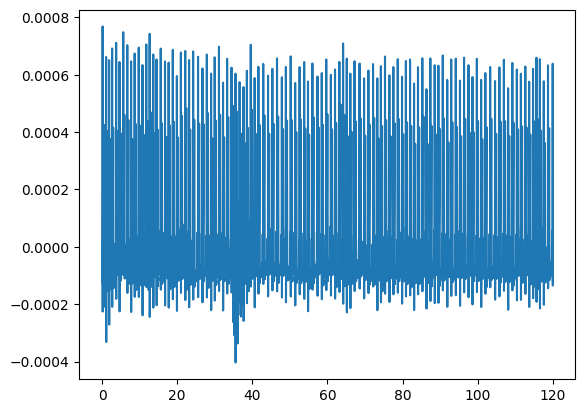

In [52]:
import matplotlib.pyplot as plt
startTime=int(0*512)
endTime=int(120*512)
plt.plot(edffile[['ECG']][1][startTime:endTime],-1*edffile[['ECG']][0][:,startTime:endTime].T)


In [72]:
zaoyin=mne.filter.filter_data(-1*edffile[['ECG']][0],512,l_freq=0,h_freq=0.01)

Setting up low-pass filter at 0.01 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 0.01 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.01 Hz)
- Filter length: 845 samples (1.650 s)



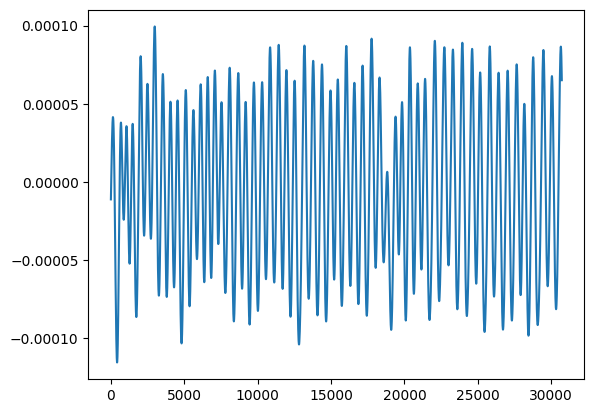

In [73]:
plt.plot(zaoyin[0][:60*512].T)

In [74]:
EEGData=-1*edffile[['ECG']][0]-zaoyin[0]

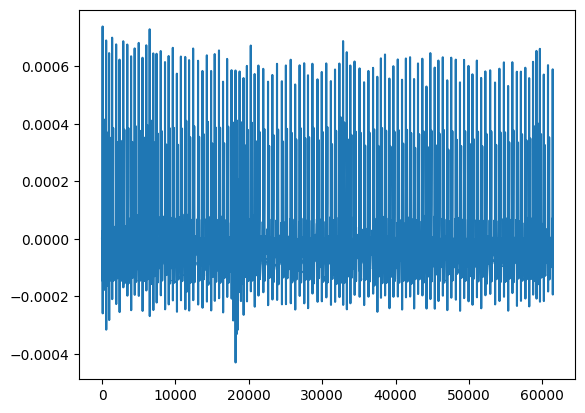

In [76]:
plt.plot(EEGData[0][startTime:endTime].T)

In [78]:
import sys
import time
import logging
import numpy as np
from biosppy.signals import ecg
from biosppy.storage import load_txt
import matplotlib.pyplot as plt


In [92]:
signal=-1*EEGData[0][startTime:endTime].T
sfreq=512
rpeaks=ecg.hamilton_segmenter(signal,sfreq)

In [89]:
len(rpeaks[0])

110

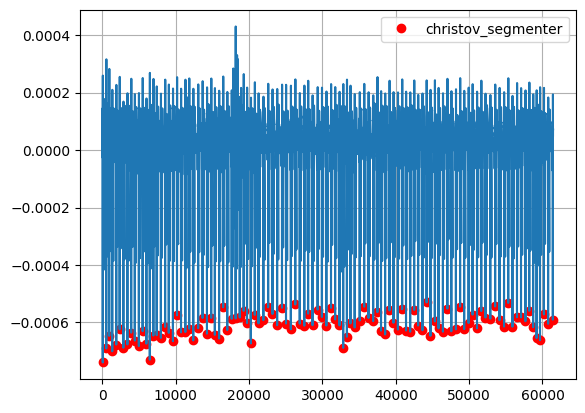

In [93]:
plt.figure()
plt.grid(True)
plt.plot(rpeaks[0], signal[rpeaks[0]], "ro", label="christov_segmenter")
plt.plot(signal)

plt.legend()
plt.show()

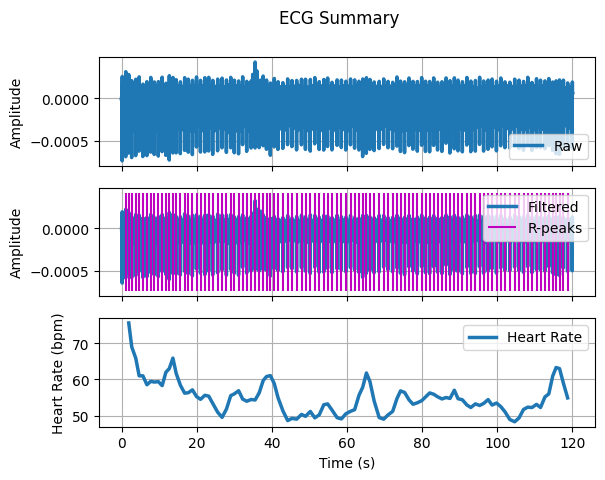

In [91]:
result=ecg.ecg(signal,sfreq)

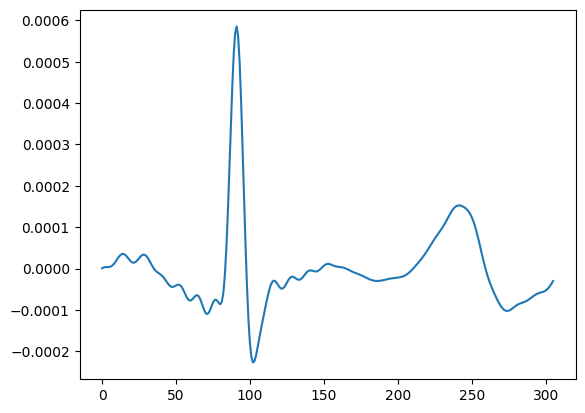

In [105]:
import pandas as pd
plt.plot(-1*result.as_dict()['templates'][0].T)

In [108]:
result.as_dict()['templates'].shape

(108, 306)

In [120]:
from torchvision.datasets import ImageFolder
dataset=ImageFolder(r'D:\project_meta\NNproject\NNI\output\video_frames\IDFolder')
dataset[1000][0].show()